In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['price'] = y

C:\Users\ClassRoom 2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [4]:
bos = bos.sample(frac=1, random_state=4).reset_index(drop=True)

In [5]:
y = bos['price']
X = bos.drop('price', axis=1)

In [6]:
cols=list(X.columns)
cols.remove('CHAS')
for col in cols:
    X[col+'_2'] = X[col]**2

In [7]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CRIM_2', 'ZN_2', 'INDUS_2', 'NOX_2', 'RM_2',
       'AGE_2', 'DIS_2', 'RAD_2', 'TAX_2', 'PTRATIO_2', 'B_2', 'LSTAT_2'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

X_trains = pd.DataFrame(X_trains, columns=X.columns)
X_tests = pd.DataFrame(X_tests, columns=X.columns)

### Lasso Regression

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter=10000)
lasso.fit(Xs, y)
pd.DataFrame(lasso.coef_, index=X.columns, columns=['coefts'])

,coefts
CRIM,-2.739667
ZN,-0.535050
INDUS,-0.723201
CHAS,0.620838
NOX,-0.000000
RM,-12.256092
AGE,-0.000000
DIS,-4.737558
RAD,3.001063
TAX,-2.042955


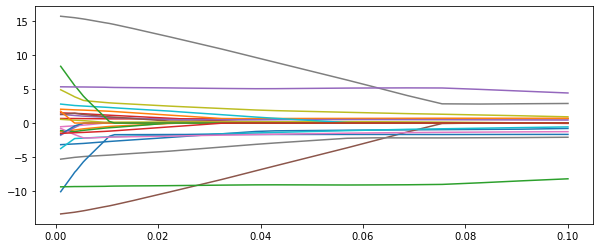

In [20]:
coefs = []
alphas = np.logspace(-3, -1, 50)
for a in alphas:
    model=Lasso(max_iter=10000, alpha=a)
    model.fit(Xs, y)
    coefs.append(model.coef_)
    
plt.figure(figsize=(10, 4))
plt.plot(alphas, coefs)
plt.show()

In [24]:
### Hyperparamter Tuning to estimate the optimum alpha
from sklearn.linear_model import LassoCV

alphas = np.logspace(-3, -1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=4, max_iter=10000)
lasso_cv.fit(Xs, y)

LassoCV(alphas=array([0.001     , 0.00109854, 0.00120679, 0.00132571, 0.00145635,
       0.00159986, 0.00175751, 0.0019307 , 0.00212095, 0.00232995,
       0.00255955, 0.00281177, 0.00308884, 0.00339322, 0.00372759,
       0.00409492, 0.00449843, 0.00494171, 0.00542868, 0.00596362,
       0.00655129, 0.00719686, 0.00790604, 0.00868511, 0.00954095,
       0.01048113, 0.01151395, 0.01264855, 0.01389495, 0.01526418,
       0.01676833, 0.0184207 , 0.0202359 , 0.02222996, 0.02442053,
       0.02682696, 0.02947052, 0.03237458, 0.0355648 , 0.0390694 ,
       0.04291934, 0.04714866, 0.05179475, 0.05689866, 0.06250552,
       0.06866488, 0.0754312 , 0.08286428, 0.09102982, 0.1       ]),
        cv=3, max_iter=10000, random_state=4)

In [25]:
lasso_cv.alpha_

0.016768329368110076

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
lasso.fit(X_trains, y_train)
y_train_pred = lasso.predict(X_trains)
y_test_pred = lasso.predict(X_tests)

print('r2 Train: ', r2_score(y_train, y_train_pred))
print('rmse Train: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('r2 Test: ', r2_score(y_test, y_test_pred))
print('rmse Test: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

r2 Train:  0.8581380189603165
rmse Train:  3.497063476840943
r2 Test:  0.7267233653393044
rmse Test:  4.6814444412394405


### Ridge Regression

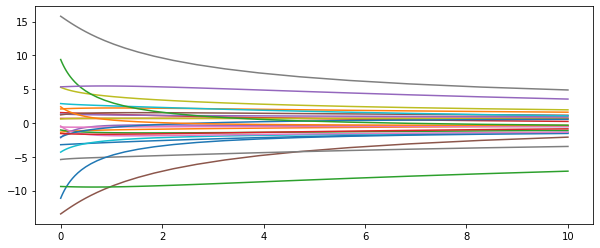

In [27]:
from sklearn.linear_model import Ridge
coefs = []
alphas = np.logspace(-3, 1, 50)
for a in alphas:
    model=Ridge(alpha=a)
    model.fit(Xs, y)
    coefs.append(model.coef_)
    
plt.figure(figsize=(10, 4))
plt.plot(alphas, coefs)
plt.show()

In [28]:
## Hyperparameter Tuning to identify the best alpha
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 1, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=3)
ridge_cv.fit(Xs, y)

RidgeCV(alphas=array([1.00000000e-03, 1.20679264e-03, 1.45634848e-03, 1.75751062e-03,
       2.12095089e-03, 2.55954792e-03, 3.08884360e-03, 3.72759372e-03,
       4.49843267e-03, 5.42867544e-03, 6.55128557e-03, 7.90604321e-03,
       9.54095476e-03, 1.15139540e-02, 1.38949549e-02, 1.67683294e-02,
       2.02358965e-02, 2.44205309e-02, 2.94705170e-02, 3.55648031e-02,
       4.29193426e-02, 5.17947468e-0...
       9.10298178e-02, 1.09854114e-01, 1.32571137e-01, 1.59985872e-01,
       1.93069773e-01, 2.32995181e-01, 2.81176870e-01, 3.39322177e-01,
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01]),
        cv=3)

In [29]:
ridge_cv.alpha_

0.4094915062380423

In [30]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_trains, y_train)
y_train_pred = ridge.predict(X_trains)
y_test_pred = ridge.predict(X_tests)

print('r2 Train: ', r2_score(y_train, y_train_pred))
print('rmse Train: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('r2 Test: ', r2_score(y_test, y_test_pred))
print('rmse Test: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

r2 Train:  0.8607010840119931
rmse Train:  3.46532820756136
r2 Test:  0.7186503726660125
rmse Test:  4.750089530072126


### ElasticNet Regression

In [31]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

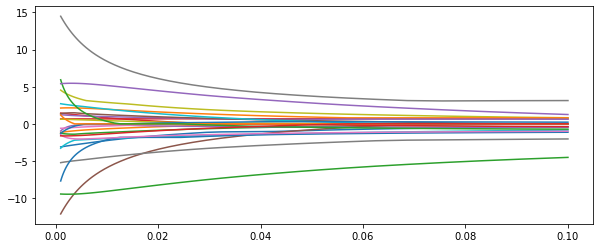

In [34]:
coefs = []
alphas = np.logspace(-3, -1, 50)
for a in alphas:
    model=ElasticNet(alpha=a, max_iter=10000)
    model.fit(Xs, y)
    coefs.append(model.coef_)
    
plt.figure(figsize=(10, 4))
plt.plot(alphas, coefs)
plt.show()

In [35]:
### Hyperparamter Tuning to identify the best alpha
alphas = np.logspace(-3, 0, 50)
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=3, max_iter=10000, random_state=4)
elasticnet_cv.fit(Xs, y)
elasticnet_cv.alpha_

0.0026826957952797246

In [37]:
elasticnet = ElasticNet(alpha=elasticnet_cv.alpha_, max_iter=10000)
elasticnet.fit(X_trains, y_train)
y_train_pred = elasticnet.predict(X_trains)
y_test_pred = elasticnet.predict(X_tests)

print('r2 Train: ', r2_score(y_train, y_train_pred))
print('rmse Train: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('r2 Test: ', r2_score(y_test, y_test_pred))
print('rmse Test: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

r2 Train:  0.8596547212416721
rmse Train:  3.478318999960843
r2 Test:  0.7226289839178119
rmse Test:  4.716384049336997
